In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import mne
import moabb
from moabb.datasets import BNCI2014_001
from moabb.paradigms import MotorImagery
from mne_connectivity import spectral_connectivity_epochs
import matplotlib.pyplot as plt
from nilearn import plotting
from matplotlib import colormaps

<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_types is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.pick_channels_regexp is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:241: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
/home/hice1/mchen439/scratch/miniconda3/envs/MATH8803/lib/python3.11/site-packages/moabb/pipelines/__init__.py:26: ModuleNotFoundError: Tensorflow is not installed. You won't be able to use these MOABB pipelines if you attempt to do so.
  warn(


To use the get_shape_from_baseconcar, InputShapeSetterEEG, BraindecodeDatasetLoaderyou need to install `braindecode`.`pip install braindecode` or Please refer to `https://braindecode.org`.


In [2]:
def symmetrize(A):
	return A + A.T - np.diag(np.diag(A))

In [3]:
# From https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8865144/ Table 2 Cortex Means
ch_names = [
    "Fz", "FC3", "FC1", "FCz", "FC2", "FC4", "C5", "C3", "C1", "Cz", "C2",
        "C4", "C6", "CP3", "CP1", "CPz", "CP2", "CP4", "P1", "Pz", "P2", "POz",
        "EOG1", "EOG2", "EOG3"
]

EEG_Locations = {
	"Fz": [0.88, 34.43, 62.21],
	"FC3": [-46.09, 7.35, 56.46],
	"FC1": [-24.69, 5.73, 71.11],
	"FCz": [0.41, 6.77, 75.19],
	"FC2": [24.09, 5.4, 72.18],
	"FC4": [47.52, 6.49, 58.34],
	"C5": [-66.15, -20.58, 33.83],
	"C3": [-50.88, -21.18, 59.95],
	"C1": [-25.56, -23.82, 75.26],
	"Cz": [-0.47, -24.64, 80.16],
	"C2": [23.84, -24.31, 78.00],
	"C4": [50.78, -23.18, 63.58],
	"C6": [66.48, -21.77, 36.16],
	"CP3": [-49.15, -47.78, 58.42],
	"CP1": [-25.64, -48.14, 71.46],
	"CPz": [-0.73, -50.47, 75.85],
	"CP2": [24.46, -49.71, 75.38],
	"CP4": [46.66, -48.71, 62.98],
	"P1":  [-25.9, -68.45, 61.21],
	"Pz": [-1.94, -69.12, 66.04],
	"P2": [20.8, -69.28, 64.82],
	"POz": [-2.76, -90.20, 42.12]
}

In [4]:
paradigm = MotorImagery(n_classes=4)
mne.set_config("MNE_DATA", "/home/hice1/mchen439/scratch/mne_data")
mne.set_config("MNE_DATASETS_BNCI_PATH", "/home/hice1/mchen439/scratch/mne_data")
print(mne.get_config())

Choosing from all possible events


{'MNE_DATA': '/home/hice1/mchen439/scratch/mne_data', 'MNE_DATASETS_ALEXEEG_PATH': '/home/hice1/mchen439/mne_data', 'MNE_DATASETS_BNCI_PATH': '/home/hice1/mchen439/scratch/mne_data', 'MNE_DATASETS_EEGBCI_PATH': '/home/hice1/mchen439/mne_data', 'MNE_DATASETS_FAKEDATASET-IMAGERY-10-2--60-60--120-120--FAKE1-FAKE2-FAKE3--C3-CZ-C4_PATH': '/tmp/tmpwour6ucf', 'MNE_DATASETS_FAKEVIRTUALREALITYDATASET-P300-21-1--60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60-60--120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120-120--TARGET-NONTARGET--C3-CZ-C4_PATH': '/tmp/tmpvhx98uwa', 'MNE_DATASETS_GIGADB_PATH': '/home/hice1/mchen439/mne_data', 'MNE_DATASETS_LEE2019-MI_PATH': '/home/hice1/mchen439/mne

/tmp/ipykernel_144689/3997935127.py:3: RuntimeWarning: Setting non-standard config type: "MNE_DATASETS_BNCI_PATH"
  mne.set_config("MNE_DATASETS_BNCI_PATH", "/home/hice1/mchen439/scratch/mne_data")


In [5]:
datasetMotorImagery = BNCI2014_001()
subjects = [1, 2, 3, 4, 5]

X, y, metadata = paradigm.get_data(dataset=datasetMotorImagery, subjects=subjects)
print(metadata.columns)
print(np.unique(y))

/home/hice1/mchen439/scratch/miniconda3/envs/MATH8803/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:310: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return func(X, **(kw_args if kw_args else {}))
/home/hice1/mchen439/scratch/miniconda3/envs/MATH8803/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:310: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return func(X, **(kw_args if kw_args else {}))
/home/hice1/mchen439/scratch/miniconda3/envs/MATH8803/lib/python3.11/site-packages/sklearn/preprocessing/_function_transformer.py:310: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  return func(X, **(kw_args if kw_args else {}))
/home/hice1/mchen439/scratch/minicond

In [ ]:
print(X.shape, y.shape, type(X), type(y), print(metadata.shape), print(type(metadata)))

(2880, 3)
<class 'pandas.core.frame.DataFrame'>
(2880, 22, 1001) (2880,) <class 'numpy.ndarray'> <class 'numpy.ndarray'> None None


## Dynamical System Fitting

In [186]:
from coupling_dynamics import mean_squared_error, henon_system
from scipy.optimize import minimize, LinearConstraint, Bounds, differential_evolution

In [187]:
instance_of_person1 = X[0, :, :]
print(metadata.iloc[0], instance_of_person1.shape)
initial_guess = np.full(shape=(instance_of_person1.shape[0], instance_of_person1.shape[0]), fill_value=0.5)
np.fill_diagonal(initial_guess, 0)
initial_guess = initial_guess.flatten()

subject         1
session    0train
run             0
Name: 0, dtype: object (22, 1001)


In [188]:
#print(np.ones(initial_guess.shape).shape[0:1])
#print(np.zeros(initial_guess.shape).shape)
#bounds = [(0, 1) for _ in range(initial_guess.shape[0])] 


#constraints = [{'type':'ineq', 'fun': lambda x: x}, {'type':'ineq', 'fun': lambda x: 1 - x}]
#constraint = LinearConstraint(np.identity(initial_guess.shape[0]), lb=1e-10, ub=1, keep_feasible=True)
bound = Bounds(np.zeros(initial_guess.shape[0]), np.ones(initial_guess.shape[0]))

In [189]:
print(mean_squared_error.__code__.co_argcount)
print(mean_squared_error.__code__.co_varnames)

3
('Cij', 'x_real', 'dynamic_system', 'channels', 'T', 'x_system')


In [190]:
print(instance_of_person1)

[[ 5.52359238  6.05479173  5.552223   ... -0.57285607 -2.828271
  -5.00875118]
 [ 1.91658213  1.74039129  0.8803432  ...  0.50618494 -3.31466548
  -6.65938125]
 [ 3.41951163  3.84870584  3.50987378 ... -1.52997242 -5.09625352
  -7.88780877]
 ...
 [-1.1856596  -1.5103461  -2.41203985 ... -2.33472371 -6.69460626
  -9.35521896]
 [-2.35736743 -3.05259983 -3.87318513 ... -2.61970359 -6.21065549
  -8.26673539]
 [-1.09144736 -1.01641231 -1.73219282 ...  0.06217741 -3.33972413
  -5.84536201]]


(22, 1001)
[0.         0.         1.4        ... 0.77902402 1.073867   0.48051687]


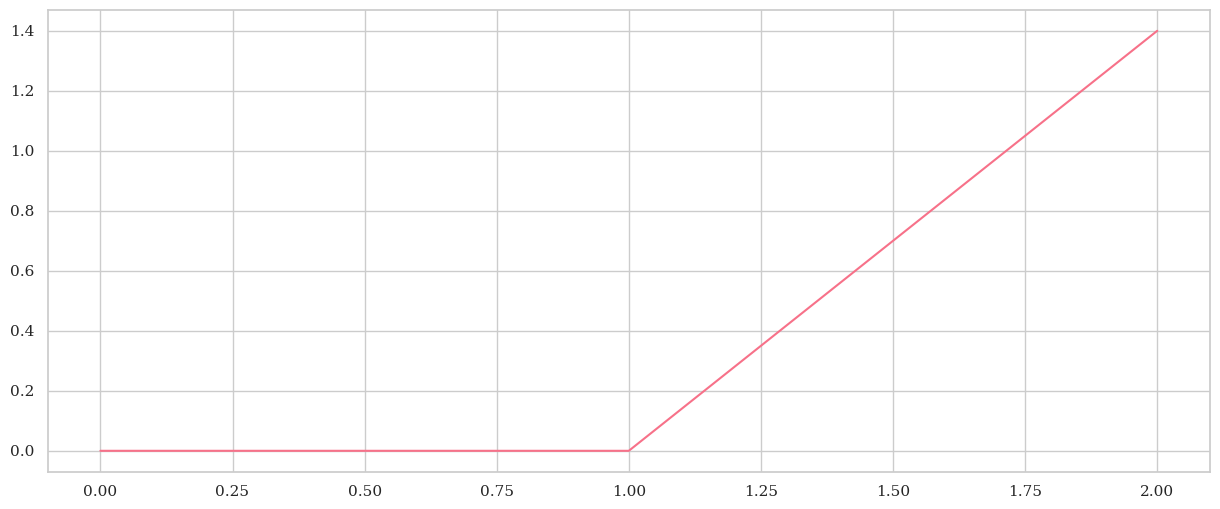

In [191]:
x_t = henon_system(np.zeros(instance_of_person1[:, 0].shape), initial_guess.reshape(instance_of_person1.shape[0], instance_of_person1.shape[0]), instance_of_person1.shape[1])
print(x_t.shape)
print(x_t[0,:])

plt.figure(figsize=(15,6))
plt.plot(x_t[0,:3])

In [151]:
result = differential_evolution(func=mean_squared_error, x0=initial_guess, args=(instance_of_person1, henon_system), bounds=bounds, maxiter=1)


In [145]:
print(result.x)
print(result.success)

[0.30474957 0.         0.32979506 0.57054025 0.52373478 0.
 0.27704231 0.         0.         0.         0.         0.
 0.         0.         0.34760697 0.         0.         0.03774883
 0.         0.         0.         0.         0.87618788 0.57110835
 0.59448318 0.26526541 0.1064212  0.95314919 0.66437695 0.85889174
 0.21201678 0.7036203  0.99600213 0.34905079 0.32901125 0.28548088
 0.51138436 0.90200435 0.53004835 0.30273087 0.07122189 0.15748041
 0.63324684 0.0639381  0.0232578  0.67594048 0.68122715 0.32703662
 0.81602711 0.58401588 0.78515215 0.95915956 0.16963084 0.87891683
 0.85799985 0.97850397 0.65371264 0.16450188 0.94196348 0.72380758
 0.35518644 0.43475427 0.58152623 0.41341231 0.44606633 0.32737274
 0.47652471 0.98864678 0.42561325 0.09978394 0.9268322  0.08709236
 0.62154362 0.97496488 0.74165747 0.9656159  0.77578223 0.52861357
 0.40450766 0.00816053 0.26582813 0.8258483  0.22088301 0.05773104
 0.61700717 0.7965235  0.14417954 0.41062223 0.63112918 0.95556206
 0.02697974

### dPLI Generation

In [11]:
feet_indices = np.where(y == "feet")[0]
left_hand_indices = np.where(y == "left_hand")[0]
right_hand_indices = np.where(y == "right_hand")[0]
tongue_indices = np.where(y == "tongue")[0]
X_feet = X[feet_indices, :, :]
X_left_hand = X[left_hand_indices, :, :]
X_right_hand = X[right_hand_indices, :, :]
X_tongue = X[tongue_indices, :, :]

print(X_feet.shape, X_left_hand.shape, X_right_hand.shape, X_tongue.shape)


(720, 22, 1001) (720, 22, 1001) (720, 22, 1001) (720, 22, 1001)


In [12]:
conn_feet = spectral_connectivity_epochs(
	X_feet,
	method="dpli",
	sfreq=250,
	fmin=1.3, # So we get at least 5 cycles
	fmax=46,
	faverage=True,
	verbose=False
)

conn_left_hand = spectral_connectivity_epochs(
	X_left_hand,
	method="dpli",
	sfreq=250,
	fmin=1.3, # So we get at least 5 cycles
	fmax=46,
	faverage=True,
	verbose=False
)

conn_right_hand = spectral_connectivity_epochs(
	X_right_hand,
	method="dpli",
	sfreq=250,
	fmin=1.3, # So we get at least 5 cycles
	fmax=46,
	faverage=True,
	verbose=False
)

conn_tongue = spectral_connectivity_epochs(
	X_right_hand,
	method="dpli",
	sfreq=250,
	fmin=1.3, # So we get at least 5 cycles
	fmax=46,
	faverage=True,
	verbose=False
)

print(conn_feet.shape, conn_left_hand.shape, conn_right_hand.shape, conn_tongue.shape)

(484, 1) (484, 1) (484, 1) (484, 1)


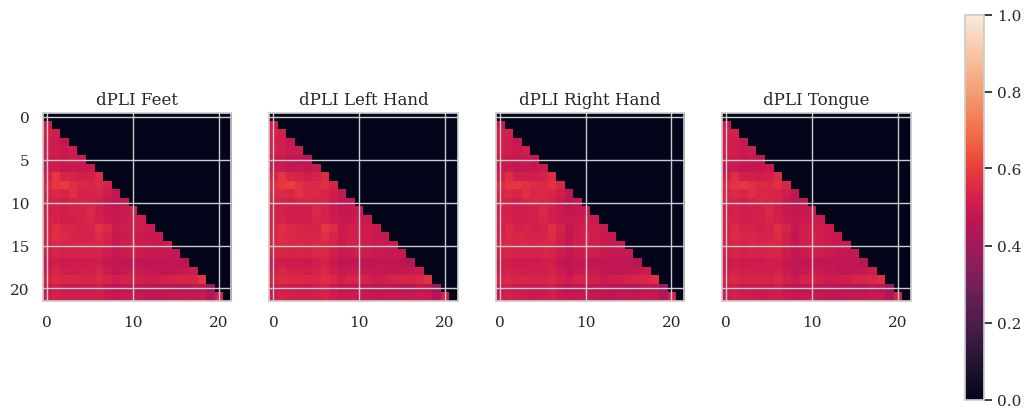

In [13]:
fig, axs = plt.subplots(1, 4, figsize=(14, 5), sharey=True)
axs[0].imshow(conn_feet.get_data("dense"), vmin=0, vmax=1)
axs[0].set_title("dPLI Feet")

axs[1].imshow(conn_left_hand.get_data("dense"), vmin=0, vmax=1)
axs[1].set_title("dPLI Left Hand")

im = axs[2].imshow(conn_right_hand.get_data("dense"), vmin=0, vmax=1)
axs[2].set_title("dPLI Right Hand")

im = axs[3].imshow(conn_tongue.get_data("dense"), vmin=0, vmax=1)
axs[3].set_title("dPLI Tongue")

fig.colorbar(im, ax=axs.ravel())
plt.show()

In [14]:
conn_feet_np = np.squeeze(conn_feet.get_data("dense"))
#conn_feet_np_nan[conn_feet_np == 0] = np.nan
#print(np.nanmean(conn_feet_np_nan), np.nanstd(conn_feet_np_nan))

In [15]:
EEG_Locations_list = []
print(conn_feet_np.shape)

for k, v in EEG_Locations.items():
	EEG_Locations_list.append(v)

EEG_Locations_list = np.array(EEG_Locations_list, dtype=float)
print(EEG_Locations_list.shape)

conn_feet_np_symm = symmetrize(conn_feet_np)

(22, 22)
(22, 3)


/tmp/ipykernel_211819/3571496347.py:1: UserWarning: 'adjacency_matrix' is not symmetric. A directed graph will be plotted.
  plotting.plot_connectome(conn_feet_np, EEG_Locations_list, title="dPLI - Healthy", edge_cmap = colormaps['seismic'], edge_vmin=0, edge_vmax=1, colorbar=True)


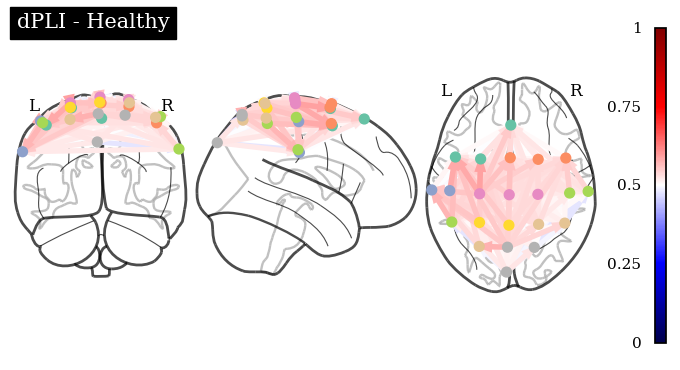

In [16]:
plotting.plot_connectome(conn_feet_np, EEG_Locations_list, title="dPLI - Healthy", edge_cmap = colormaps['seismic'], edge_vmin=0, edge_vmax=1, colorbar=True)

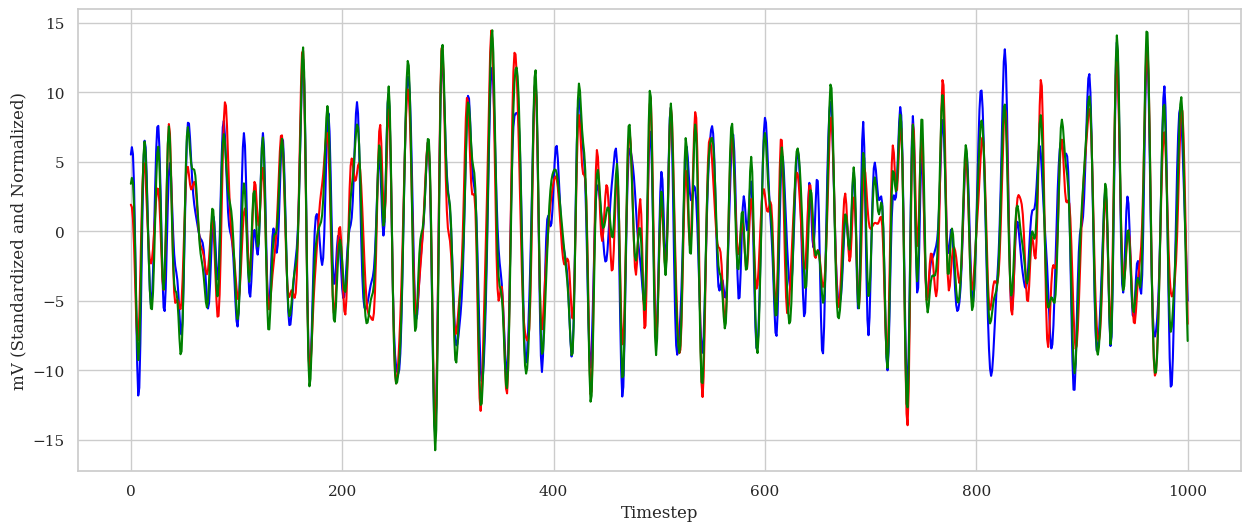

In [23]:
plt.figure(figsize=(15,6))
plt.plot(X[0, 0, :], c="b")
plt.plot(X[0, 1, :], c="r")
plt.plot(X[0, 2, :], c="g")
plt.xlabel("Timestep")
plt.ylabel("mV (Standardized and Normalized)")
plt.show()

In [1]:
instance1 = X[0]
print(instance1.shape)

NameError: name 'X' is not defined